# Simple Linear Regression

 **Objective**: To develop a predictive model that accurately estimates the delivery time based on sorting time, enabling optimization and better management of delivery processes for enhanced efficiency and customer satisfaction.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [34]:
delivery=pd.read_csv(r"D:\datascience\delivery_time.csv")
delivery

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [35]:
delivery.rename(columns={'Delivery Time':'Delivery_time','Sorting Time':'Sorting_time'},inplace=True)

<BarContainer object of 21 artists>

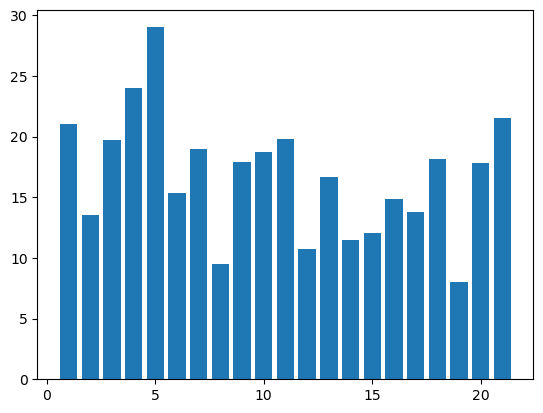

In [36]:
plt.bar(height = delivery.Delivery_time, x = np.arange(1, 22, 1))

(array([2., 3., 2., 2., 4., 4., 2., 1., 0., 1.]),
 array([ 8. , 10.1, 12.2, 14.3, 16.4, 18.5, 20.6, 22.7, 24.8, 26.9, 29. ]),
 <BarContainer object of 10 artists>)

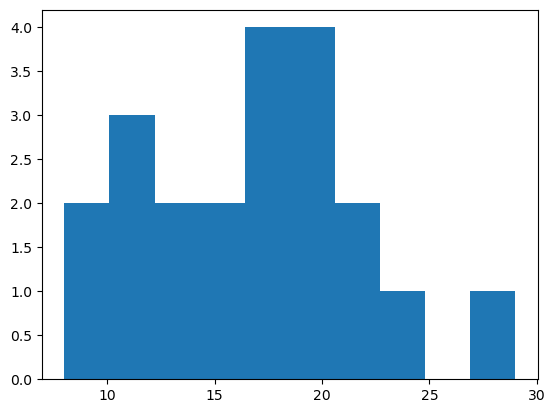

In [7]:
plt.hist(delivery.Delivery_time)

{'whiskers': [<matplotlib.lines.Line2D at 0x19ea8b8faf0>,
 'caps': [<matplotlib.lines.Line2D at 0x19ea898c070>,
 'boxes': [<matplotlib.lines.Line2D at 0x19ea8b8f850>],
 'medians': [<matplotlib.lines.Line2D at 0x19ea898c5b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x19ea898c850>],
 'means': []}

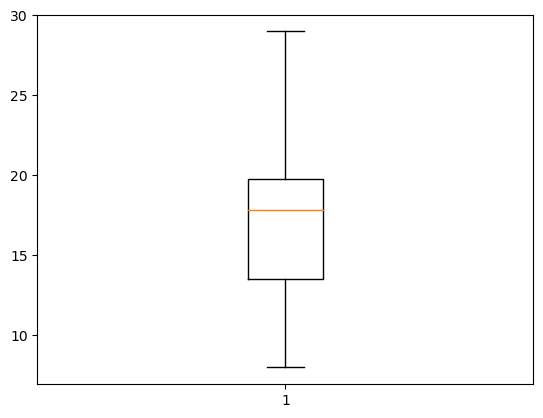

In [8]:
plt.boxplot(delivery.Delivery_time)

No outlier

<BarContainer object of 21 artists>

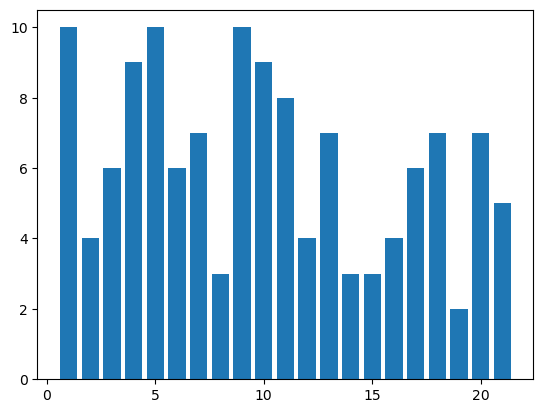

In [10]:
plt.bar(height = delivery.Sorting_time, x = np.arange(1, 22, 1))

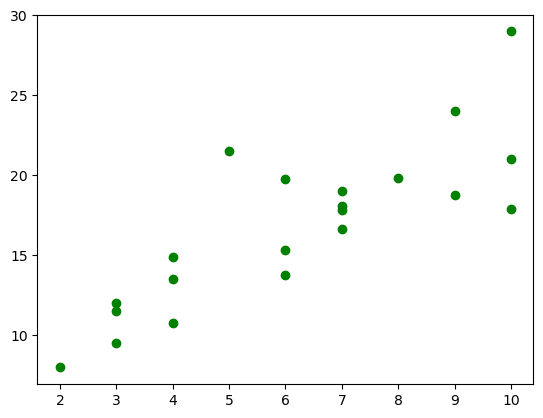

In [11]:
plt.scatter(x =delivery['Sorting_time'] , y =delivery['Delivery_time'], color = 'green') 

It shows positive correlation between delivery time and sorting time

In [12]:
np.corrcoef(delivery.Sorting_time,delivery.Delivery_time) 

array([[1.        , 0.82599726],
       [0.82599726, 1.        ]])

In [13]:
cov_output = np.cov(delivery.Sorting_time,delivery.Delivery_time)[0, 1]
cov_output   #covariance

10.655809523809525

In [37]:
X = delivery['Sorting_time']
y = delivery['Delivery_time']

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((16,), (5,), (16,), (5,))

In [44]:
train_data = pd.concat([X_train, y_train], axis=1)


In [45]:
import statsmodels.formula.api as smf
model = smf.ols('Delivery_time ~ Sorting_time', data=train_data).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          Delivery_time   R-squared:                       0.760
Model:                            OLS   Adj. R-squared:                  0.742
Method:                 Least Squares   F-statistic:                     44.22
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           1.10e-05
Time:                        15:05:20   Log-Likelihood:                -38.507
No. Observations:                  16   AIC:                             81.01
Df Residuals:                      14   BIC:                             82.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        4.6823      1.945      2.408   

C:\Users\reshm\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [47]:
# Predict on the test set
y_test_pred = model.predict(X_test)
y_test_pred

0     24.924743
17    18.852010
15    12.779276
1     12.779276
8     24.924743
dtype: float64

In [48]:
# Model Evaluation on Test data
test_res = y_test - y_test_pred
test_sqrs = test_res * test_res
test_mse = np.mean(test_sqrs)
test_rmse = np.sqrt(test_mse)
print(f"Test RMSE: {test_rmse}")


Test RMSE: 3.7478979383962745


In [49]:
# Model Evaluation on train data
y_train_pred = model.predict(X_train)
train_res = y_train - y_train_pred
train_sqrs = train_res * train_res
train_mse = np.mean(train_sqrs)
train_rmse = np.sqrt(train_mse)
print(f"Train RMSE: {train_rmse}")

Train RMSE: 2.6852408839915527


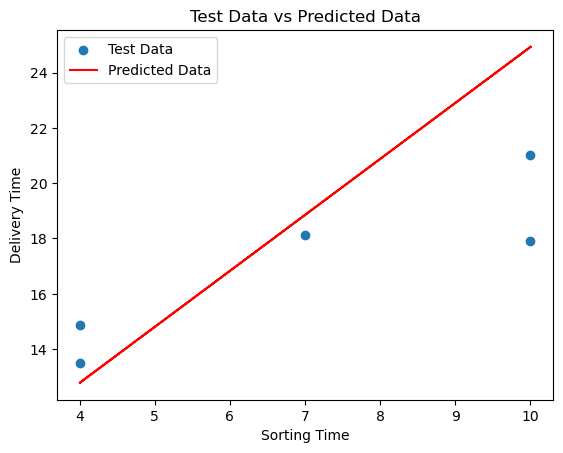

In [50]:
# Visualization
plt.scatter(X_test, y_test, label='Test Data')
plt.plot(X_test, y_test_pred, 'r', label='Predicted Data')
plt.xlabel('Sorting Time')
plt.ylabel('Delivery Time')
plt.title('Test Data vs Predicted Data')
plt.legend()
plt.show()

### Log transformation

In [51]:
X_log = np.log(X)

In [52]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_log, y, test_size=0.2, random_state=42)

In [53]:
train_data = pd.concat([X_train, y_train], axis=1)


In [72]:
model_L = smf.ols('Delivery_time ~ np.log(Sorting_time)', data=train_data).fit()
print(model_L.summary())


                            OLS Regression Results                            
Dep. Variable:          Delivery_time   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     58.25
Date:                Sun, 12 Nov 2023   Prob (F-statistic):           2.36e-06
Time:                        15:37:19   Log-Likelihood:                 7.5289
No. Observations:                  16   AIC:                            -11.06
Df Residuals:                      14   BIC:                            -9.513
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.6331 

C:\Users\reshm\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [73]:
y_test_pred_L = model_L.predict(X_test)


In [74]:
test_res_L = y_test - y_test_pred_L
test_sqrs_L = test_res_L * test_res_L
test_mse_L= np.mean(test_sqrs_L)
test_rmse_L= np.sqrt(test_mse_L)
print(f"Test RMSE_L: {test_rmse_L}")

Test RMSE_L: 0.1554473614237478


In [75]:
# Model Evaluation on train data
y_train_pred_L = model_L.predict(X_train)
train_res_L = y_train - y_train_pred_L
train_sqrs_L = train_res_L * train_res_L
train_mse_L = np.mean(train_sqrs_L)
train_rmse_L = np.sqrt(train_mse_L)
print(f"Train RMSE_L: {train_rmse_L}")

Train RMSE_L: 0.15114802060923246


### Exponential transformation

In [64]:
X = delivery[['Sorting_time']]
y = np.log(delivery['Delivery_time'])  # Apply log transformation to y


In [65]:
X.shape,y.shape

((21, 1), (21,))

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
train_data = pd.concat([X_train, y_train], axis=1)


In [71]:
# Fit model with exponential transformation
model_exp = smf.ols('np.log(Delivery_time) ~ Sorting_time', data=train_data).fit()
print(model_exp.summary())



                              OLS Regression Results                             
Dep. Variable:     np.log(Delivery_time)   R-squared:                       0.783
Model:                               OLS   Adj. R-squared:                  0.768
Method:                    Least Squares   F-statistic:                     50.57
Date:                   Sun, 12 Nov 2023   Prob (F-statistic):           5.24e-06
Time:                           15:36:45   Log-Likelihood:                 22.343
No. Observations:                     16   AIC:                            -40.69
Df Residuals:                         14   BIC:                            -39.14
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0

C:\Users\reshm\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [76]:
y_test_pred_exp = np.exp(model_exp.predict(X_test))

In [77]:
test_res_exp = np.exp(y_test) - y_test_pred_exp
test_sqrs_exp = test_res_exp * test_res_exp
test_mse_exp = np.mean(test_sqrs_exp)
test_rmse_exp = np.sqrt(test_mse_exp)
print(f"Test RMSE with Exponential Transformation: {test_rmse_exp}")

Test RMSE with Exponential Transformation: 14.360335851248742


In [79]:
y_train_pred_exp = np.exp(model_exp.predict(X_train))


In [80]:
train_res_exp = np.exp(y_train) - y_train_pred_exp
train_sqrs_exp = train_res_exp * train_res_exp
train_mse_exp = np.mean(train_sqrs_exp)
train_rmse_exp = np.sqrt(train_mse_exp)
print(f"Train RMSE with Exponential Transformation: {train_rmse_exp}")

Train RMSE with Exponential Transformation: 14.886565665209803


In [103]:
# Choose the best model using RMSE
data = {"MODEL":pd.Series(["SLR", "Log model", "Exp model"]), "Train RMSE":pd.Series([train_rmse,train_rmse_L,train_rmse_exp ]),"Test RMSE":pd.Series([test_rmse,test_rmse_L,test_rmse_exp])}
table_rmse = pd.DataFrame(data)
table_rmse

,MODEL,Train RMSE,Test RMSE
0,SLR,2.685241,3.747898
1,Log model,0.151148,0.155447
2,Exp model,14.886566,14.360336


log model is the best model